In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

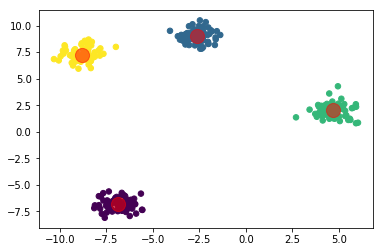

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

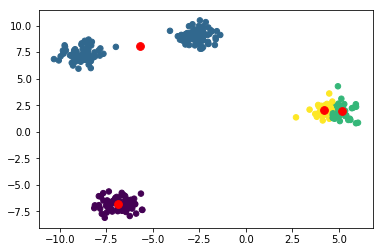

In [54]:
from sklearn.metrics import pairwise_distances_argmin
# ?pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=30, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red',
            s=60, cmap='viridis');

In [32]:
rng = np.random.RandomState(2)

In [45]:
i = rng.permutation(X.shape[0])[0:4]

In [46]:
i

array([167, 294, 267, 257])

In [37]:
X.shape

(300, 2)

In [42]:
centers = X[i]
centers

array([[-6.64918792, -6.89972644],
       [-3.17299861,  8.29656215],
       [-2.15708337, 10.3285595 ],
       [-6.86492109, -6.58131062]])

In [47]:
labels = pairwise_distances_argmin(X, centers)

In [48]:
labels

array([1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3,
       3, 0, 3, 1, 0, 0, 1, 1, 1, 1, 3, 3, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3,
       2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 2, 1, 2, 2, 0, 1, 1, 3,
       0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 3, 0, 3, 1, 1, 3, 0, 1,
       1, 1, 2, 1, 3, 1, 2, 3, 3, 1, 3, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 3, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 1, 1, 1, 2, 0, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 0, 1, 1,
       3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1], d

In [50]:
new_centers = np.array([X[labels == i].mean(0)
                                for i in range(4)])
new_centers

array([[-6.56251822, -7.19399052],
       [-2.25265971,  5.68357862],
       [-2.23595293,  9.59896522],
       [-7.18125512, -6.4575501 ]])

In [55]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html (read this example Thoroughly)